# 1. 데이터 보기.

In [53]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
import os
os.name

'nt'

In [162]:
# 한글 깨짐 방지
if os.name=="nt":
    plt.rcParams["font.family"]='Malgun Gothic' # 맑은 고딕

In [56]:
df=pd.read_csv("./../data/Lakers.csv")
df.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


In [57]:
df_copy=df.copy()
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


## 칼럼 설명

* date : 경기 일자
* opponent : 대전 팀
* game_type : 홈 경기 vs 원정 경기
* time : 분, 초
* period : 쿼터 (한 쿼터 당 12분 씩, 동점인 경우 5 쿼터 진행)
* etype : 유형
* team : 팀 구분 (LAL : LA lakers 팀)
* player : 선수 명
* result : 결과
* points : 점수
* type : 세부 행동
* x, y : 상대편 뒤 골대 뒤에서 바라본 (x,y) 좌표이다. 골대의 위치를 표시해준다.

In [58]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
dtype: int64

In [59]:
df_copy.dtypes

date           int64
opponent      object
game_type     object
time          object
period         int64
etype         object
team          object
player        object
result        object
points         int64
type          object
x            float64
y            float64
dtype: object

In [60]:
df_copy.describe()

,date,period,points,x,y
count,3.462400e+04,34624.000000,34624.000000,13067.000000,13067.000000
mean,2.008694e+07,2.535524,0.462714,25.317670,13.430550
std,4.372405e+03,1.124725,0.849231,11.185946,8.665827
min,2.008103e+07,1.000000,0.000000,0.000000,3.000000
25%,2.008121e+07,2.000000,0.000000,20.000000,6.000000
50%,2.009012e+07,3.000000,0.000000,25.000000,10.000000
75%,2.009031e+07,4.000000,1.000000,31.000000,20.000000
max,2.009041e+07,5.000000,3.000000,51.000000,90.000000


In [61]:
df_copy.describe(include="object")

,opponent,game_type,time,etype,team,player,result,type
count,34624,34624,34624,34624,34624,29231,16888,24242
unique,29,2,717,10,31,370,2,73
top,DEN,home,0:00,shot,LAL,Kobe Bryant,made,def
freq,1855,17471,357,13108,17235,2945,8916,4768


In [62]:
df_copy.info() # info = dtypes + isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34624 entries, 0 to 34623
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       34624 non-null  int64  
 1   opponent   34624 non-null  object 
 2   game_type  34624 non-null  object 
 3   time       34624 non-null  object 
 4   period     34624 non-null  int64  
 5   etype      34624 non-null  object 
 6   team       34624 non-null  object 
 7   player     29231 non-null  object 
 8   result     16888 non-null  object 
 9   points     34624 non-null  int64  
 10  type       24242 non-null  object 
 11  x          13067 non-null  float64
 12  y          13067 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 3.4+ MB


* 범주형 변수 : opponent, game_type, period, etype, team, player, result, type (빈도 계산 가능)
* 연속형 변수 : date, time, points, x, y (수치 계산 가능)

In [75]:
print("Opponent : ", df_copy["opponent"].unique())
print("Game_Type :", df_copy["game_type"].unique())
print("Period : ", df_copy["period"].unique())
print("Etype : ", df_copy["etype"].unique())
print("Team : ", df_copy["team"].unique())
print("Player : ", df_copy["player"].unique())

Opponent :  ['POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN' 'TOR' 'IND'
 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS' 'UTA' 'GSW'
 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Game_Type : ['home' 'away']
Period :  [1 2 3 4 5]
Etype :  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']
Team :  ['OFF' 'LAL' 'POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN'
 'TOR' 'IND' 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS'
 'UTA' 'GSW' 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Player :  [nan 'Pau Gasol' 'Vladimir Radmanovic' 'Derek Fisher' 'Greg Oden'
 'LaMarcus Aldridge' 'Kobe Bryant' 'Travis Outlaw' 'Andrew Bynum'
 'Brandon Roy' 'Steve Blake' 'Joel Przybilla' 'Lamar Odom'
 'Rudy Fernandez' 'Trevor Ariza' 'Jordan Farmar' 'Channing Frye'
 'Sergio Rodriguez' 'Sasha Vujacic' 'Jerryd Bayless' 'Nicolas Batum'
 'Luke Walton' 'Ike Diogu' 'Josh Powell' 'Chris Mihm' 'Chris Kaman'
 'Baron Davis' 'Tim Thomas' 'Cuttino Mobley' 'Al

In [77]:
print("Result :", df_copy["result"].unique())
print("Type : ", df_copy["type"].unique())
# game_type, period, result 등으로 묶어서 나타낼 수 있다.

Result : [nan 'missed' 'made']
Type :  [nan 'hook' 'off' 'layup' 'shooting' 'personal' 'jump' 'pullup jump' 'def'
 'driving layup' 'driving finger roll layup' 'regular' 'offensive' '3pt'
 'turnaround jump' 'putback layup' 'slam dunk' 'tip' 'dunk'
 'defensive goaltending' 'hook bank' 'running layup' 'official'
 'driving slam dunk' 'short' 'driving reverse layup' 'kicked ball'
 'putback dunk' 'technical' 'alley oop dunk' 'turnaround fade away'
 'running jump' 'delay of game' 'defense 3 second' 'fade away bank'
 'floating jump' 'driving dunk' 'loose ball' 'running bank' 'running dunk'
 'fade away jumper' 'finger roll layup' 'turnaround hook' 'reverse layup'
 'reverse dunk' 'jump hook' 'jump bank' 'double technical' 'running hook'
 'driving jump' 'turnaround bank' 'step back jump' 'turnaround bank hook'
 'pullup bank' 'alley oop layup' 'putback slam dunk' 'flagrant type 1'
 'running reverse layup' 'running finger roll layup' 'reverse slam dunk'
 'hanging technical' 'running slam dunk' 'dri

In [83]:
print("총 데이터의 개수 : ", df_copy.shape[0]*df_copy.shape[1])
print(f"결측치의 개수 : {df_copy.isnull().sum().sum()}, 전체 데이터의 {((df_copy.isnull().sum().sum())/(df_copy.shape[0]*df_copy.shape[1]))*100:.2f}%를 차지한다.")
print("LAL와 경기한 상대편 팀의 개수 : ", df_copy["opponent"].nunique())
print("LAL의 행동 개수 : ", df_copy["etype"].nunique())
print("LAL의 세부 행동 개수 : ", df_copy["type"].nunique())

총 데이터의 개수 :  450112
결측치의 개수 : 76625, 전체 데이터의 17.02%를 차지한다.
LAL와 경기한 상대편 팀의 개수 :  29
LAL의 행동 개수 :  10
LAL의 세부 행동 개수 :  73


# 2. 데이터를 보고 질문하기.

## 강사님 질문

* LAL의 홈 경기 비율 vs 원정 경기 비율 ?
* 경기에서 선수들이 제일 많이 한 행동 유형(etype)은?
* 이번 시즌에서의 LAL의 경기 결과는?
* LAL 선수들은 코트의 어디 위치에서 어떤 동작을 했는가?

## 나의 질문

* result에 따른 etype의 비율?
* 각 선수의 etype의 개수?
* game_type에 따른 세부 행동 개수?
* 상대팀 경기 횟수?

# 3. 데이터 정비하기.

## 3-1. 시간 타입의 데이터 정비하기.

In [84]:
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


In [85]:
df_copy.dtypes

date           int64
opponent      object
game_type     object
time          object
period         int64
etype         object
team          object
player        object
result        object
points         int64
type          object
x            float64
y            float64
dtype: object

In [88]:
df_copy["datetime"]=df_copy["date"].astype("str")+" "+df_copy["time"]
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,20081028 12:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,20081028 11:39
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,20081028 11:37
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,20081028 11:25
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,20081028 11:23


In [90]:
df_copy["datetime"]=pd.to_datetime(df_copy["datetime"], format="%Y%m%d %H:%M:%S")
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00


In [91]:
df_copy["date"]=pd.to_datetime(df_copy["date"], format="%Y%m%d")
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00


In [93]:
df_copy.dtypes # date와 datetime 모두 datetime으로 변경해주었다.

date         datetime64[ns]
opponent             object
game_type            object
time                 object
period                int64
etype                object
team                 object
player               object
result               object
points                int64
type                 object
x                   float64
y                   float64
datetime     datetime64[ns]
dtype: object

## 3-2. 결측치 처리하기.

In [94]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
datetime         0
dtype: int64

In [96]:
df_copy.isnull().any(axis=0)

date         False
opponent     False
game_type    False
time         False
period       False
etype        False
team         False
player        True
result        True
points       False
type          True
x             True
y             True
datetime     False
dtype: bool

* player, result, type은 고유한 값이기 때문에 따로 NaN 값을 채워줄 필요가 없다.
* x, y는 좌표이기 때문에, 적절한 값을 대입시켜줘야 한다.

**[tip] x,y에 0을 채워 넣기 전에 실제 데이터에 0이 있는지 확인해야한다. 확인하지 않으면, 새로 채운 값이 실제 값을 가릴 수 있기 때문이다.**
<br/> ➡ 확인해 본 결과, x column 에는 0이 있기 때문에, 다른 값을 채워야 한다.

In [128]:
df_copy["x"].unique() # 0이 들어 있다.

array([nan, 23., 25., 36., 30., 34., 15., 46., 21., 39., 20., 26., 17.,
        8., 31., 47., 14., 29.,  1., 38., 41., 44., 43., 37.,  9.,  6.,
       22., 27., 10., 48., 16., 28., 18., 49.,  0., 42., 32.,  7., 13.,
       33., 11., 12.,  2.,  5., 35., 40.,  3., 51., 24., 45., 19.,  4.,
       50.])

In [141]:
print(df_copy.loc[df_copy["x"]==-1, "x"].index.tolist()) # x=0인 부분은 존재한다.
print(df_copy.loc[df_copy["y"]==0, "y"].index.tolist()) # y=0인 부분은 없다.
# 나는 결측치에 x에는 -1, y에는 0을 대입시켜주었다.

[]
[]


# 4. EDA & Visualization

## 4-1. LAL의 홈 경기 비율 vs 원정 경기 비율 ?

In [209]:
df_copy[["date", "game_type"]]

,date,game_type
0,2008-10-28,home
1,2008-10-28,home
2,2008-10-28,home
3,2008-10-28,home
4,2008-10-28,home
...,...,...
34619,2009-04-14,home
34620,2009-04-14,home
34621,2009-04-14,home
34622,2009-04-14,home


In [210]:
df_copy[["date", "game_type"]].groupby(["date", "game_type"]).sum()

,
date,game_type
2008-10-28,home
2008-10-29,away
2008-11-01,away
2008-11-05,home
2008-11-09,home
...,...
2009-04-07,away
2009-04-09,home
2009-04-10,away


In [211]:
df_copy[["date", "game_type"]].groupby(["date", "game_type"])["game_type"].count()

date        game_type
2008-10-28  home         416
2008-10-29  away         455
2008-11-01  away         493
2008-11-05  home         503
2008-11-09  home         425
                        ... 
2009-04-07  away         437
2009-04-09  home         498
2009-04-10  away         466
2009-04-12  home         407
2009-04-14  home         471
Name: game_type, Length: 78, dtype: int64

In [212]:
df_copy[["date", "game_type"]].groupby(["date", "game_type"]).sum().reset_index()

,date,game_type
0,2008-10-28,home
1,2008-10-29,away
2,2008-11-01,away
3,2008-11-05,home
4,2008-11-09,home
...,...,...
73,2009-04-07,away
74,2009-04-09,home
75,2009-04-10,away
76,2009-04-12,home


In [216]:
df_sum=df_copy[["date", "game_type"]].groupby(["date", "game_type"]).sum().reset_index()
df_sum['game_type'].value_counts()

home    39
away    39
Name: game_type, dtype: int64

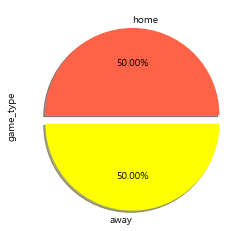

In [227]:
_=df_sum['game_type'].value_counts().plot.pie(colors=["tomato", "yellow"], shadow=True, explode=[0, 0.1], autopct="%.2f%%")
_=plt.savefig("./../images_Lakers/practice.png")

In [158]:
df_drop=df_copy.drop_duplicates(subset=["date"], keep="first") # 앞에 있는 것을 살린다.
df_drop

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
416,2008-10-29,LAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-29 12:00:00
871,2008-11-01,DEN,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-11-01 12:00:00
1364,2008-11-05,LAC,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-11-05 12:00:00
1867,2008-11-09,HOU,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-11-09 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32345,2009-04-07,SAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2009-04-07 12:00:00
32782,2009-04-09,DEN,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2009-04-09 12:00:00
33280,2009-04-10,POR,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2009-04-10 12:00:00
33746,2009-04-12,MEM,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2009-04-12 12:00:00


In [168]:
df_drop["game_type"].value_counts()

home    39
away    39
Name: game_type, dtype: int64

In [186]:
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨짐 방지

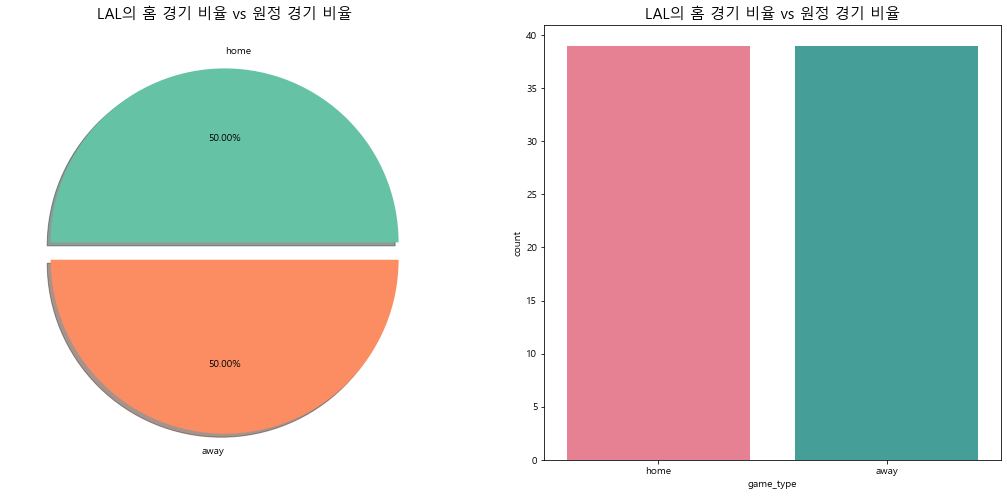

In [202]:
fig,ax=plt.subplots(1, 2, figsize=(18,8))
color_list=sns.color_palette("Set2", df_copy["game_type"].nunique())

_=df_drop["game_type"].value_counts().plot.pie(ax=ax[0], autopct="%.2f%%", explode=[0, 0.1], shadow=True, colors=color_list)
_=ax[0].set_title("LAL의 홈 경기 비율 vs 원정 경기 비율", size=15)
_=ax[0].set_ylabel("")

_=sns.countplot(data=df_drop, x="game_type", ax=ax[1], palette="husl")
_=ax[1].set_title("LAL의 홈 경기 비율 vs 원정 경기 비율", size=15)

fig.savefig("./../images_Lakers/LAL의 홈 경기 비율 vs 원정 경기 비율.png", dpi=200, facecolor="#F6F7FB")

## 4-2. 경기에서 선수들이 제일 많이 한 행동 유형(etype)은?

> 단순하게 표기하고 싶으면 countplot을 이용하면 된다.
<br/>만약에 period 별로 etype의 개수를 세고 싶으면 ➡ period, etype groupby 실행하기 ➡ reset_index와 as_index=False 이용하기. ➡ pivot table로 변경하기. ➡ Stacked Bar Graph 그리기.

In [229]:
print("Etype : ", df_copy["etype"].unique())

Etype :  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']


In [231]:
df_copy["etype"].value_counts()

shot          13108
rebound        7971
free throw     3780
foul           3417
sub            2891
turnover       2261
timeout         950
jump ball       131
violation       114
ejection          1
Name: etype, dtype: int64

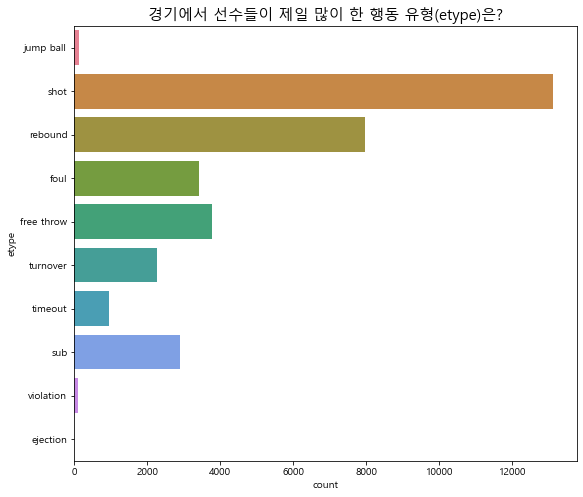

In [243]:
fig, ax=plt.subplots(1, 1, figsize=(9,8))

_=sns.countplot(data=df_copy, y="etype", palette="husl")
_=ax.set_title("경기에서 선수들이 제일 많이 한 행동 유형(etype)은?", size=15)

fig.savefig("./../images_Lakers/경기에서 선수들이 제일 많이 한 행동 유형(etype).png", dpi=200, facecolor="#F6F7FB")

In [264]:
df_copy.groupby(["etype", "period"]).size().reset_index() # 위와 아래는 같은 코드이다.

,etype,period,0
0,ejection,3,1
1,foul,1,665
2,foul,2,887
3,foul,3,848
4,foul,4,1002
5,foul,5,15
6,free throw,1,666
7,free throw,2,944
8,free throw,3,949
9,free throw,4,1205


In [288]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
datetime         0
dtype: int64

In [291]:
df_copy.groupby(["etype", "period"])["team"].count().reset_index()

,etype,period,team
0,ejection,3,1
1,foul,1,665
2,foul,2,887
3,foul,3,848
4,foul,4,1002
5,foul,5,15
6,free throw,1,666
7,free throw,2,944
8,free throw,3,949
9,free throw,4,1205


In [320]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
datetime         0
dtype: int64

In [333]:
df2=df_copy.groupby(["etype", "period"], as_index=False)["team"].count() # reset_index와 동일한 역할을 수행한다.
df2.columns=['etype', 'period', 'total_count']
df2

,etype,period,total_count
0,ejection,3,1
1,foul,1,665
2,foul,2,887
3,foul,3,848
4,foul,4,1002
5,foul,5,15
6,free throw,1,666
7,free throw,2,944
8,free throw,3,949
9,free throw,4,1205


In [334]:
df_huePer=pd.pivot_table(df2, index="etype", columns="period", values="total_count")
df_huePer
# 동점인 경우만 5 quarter를 진행하기 때문에, 다른 period의 값 보다는 훨씬 작은 편에 속한다.

period,1,2,3,4,5
etype,,,,,
ejection,NaN,NaN,1.0,NaN,NaN
foul,665.0,887.0,848.0,1002.0,15.0
free throw,666.0,944.0,949.0,1205.0,16.0
jump ball,85.0,16.0,7.0,21.0,2.0
rebound,2023.0,1966.0,1986.0,1976.0,20.0
shot,3500.0,3279.0,3232.0,3063.0,34.0
sub,555.0,915.0,584.0,832.0,5.0
timeout,166.0,266.0,185.0,327.0,6.0
turnover,547.0,571.0,533.0,608.0,2.0


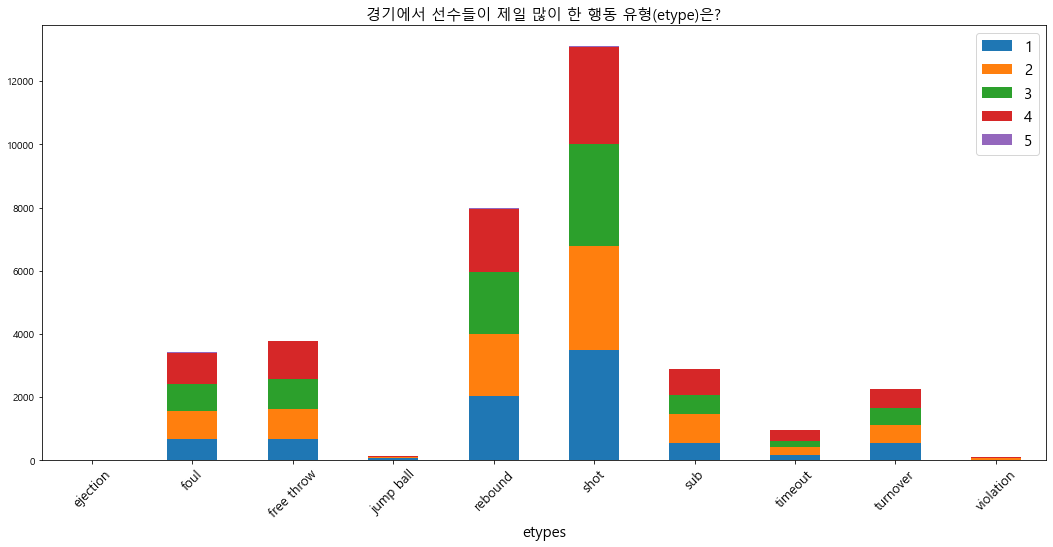

In [335]:
_=df_huePer.plot.bar(stacked=True, figsize=(18,8)) # index : x, columns : stacked
_=plt.legend(fontsize=15)
_=plt.xticks(fontsize=13, rotation=45)
_=plt.xlabel("etypes", fontsize=15)
_=plt.title("경기에서 선수들이 제일 많이 한 행동 유형(etype)은?", fontsize=15)

fig.savefig("./../images_Lakers/경기에서 선수들이 제일 많이 한 행동 유형(etype)_bar.png", dpi=200, facecolor="#F6F7FB")
# stacked 처리한 것이 훨씬 보기 편리하다.

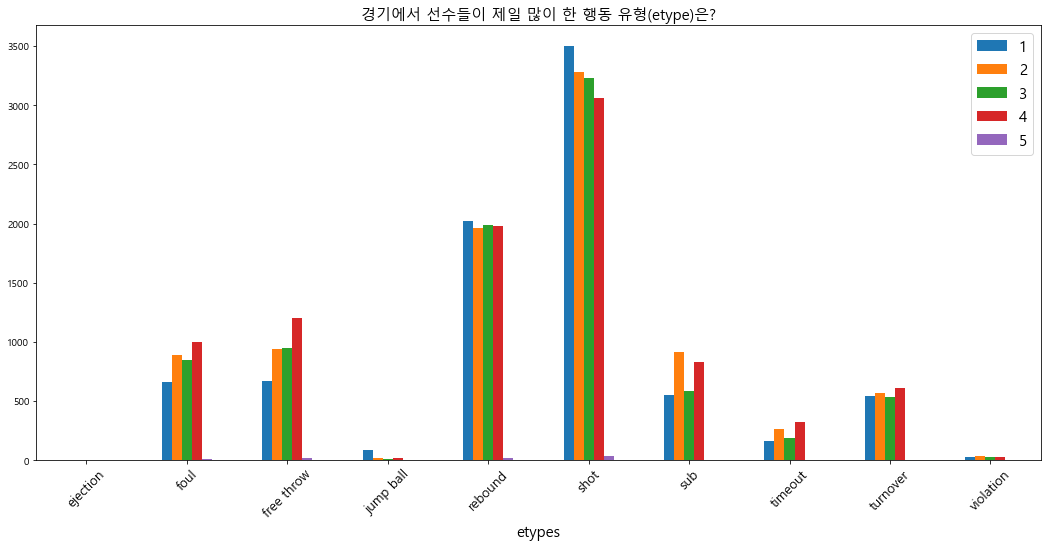

In [338]:
_=df_huePer.plot.bar(figsize=(18,8)) # index : x, columns : hue
_=plt.legend(fontsize=15)
_=plt.xticks(fontsize=13, rotation=45)
_=plt.xlabel("etypes", fontsize=15)
_=plt.title("경기에서 선수들이 제일 많이 한 행동 유형(etype)은?", fontsize=15)

fig.savefig("./../images_Lakers/경기에서 선수들이 제일 많이 한 행동 유형(etype)_bar_hue.png", dpi=200, facecolor="#F6F7FB")

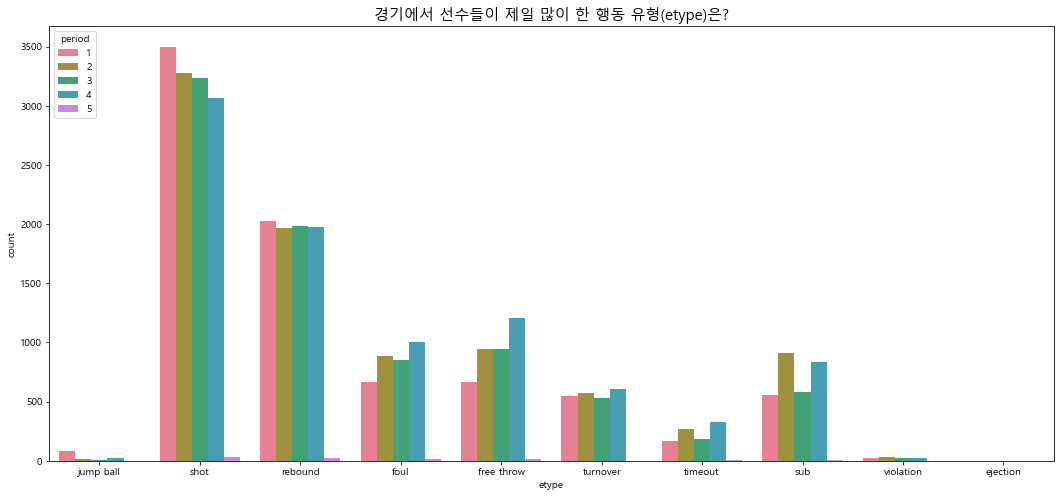

In [315]:
fig, ax=plt.subplots(1, 1, figsize=(18,8))

_=sns.countplot(data=df_copy, x="etype", palette="husl", hue="period")
_=ax.set_title("경기에서 선수들이 제일 많이 한 행동 유형(etype)은?", size=15)

fig.savefig("./../images_Lakers/경기에서 선수들이 제일 많이 한 행동 유형(etype)_sns.png", dpi=200, facecolor="#F6F7FB")

## 4-3. 이번 시즌에서의 LAL의 경기 결과는? 시계열로 표현하기.